# Familiar EDA:  Red and Black Chinchompas #

## Practical Interest ##
From 18 Sept. 2020 to 25 Sept. 2020, black chinchompas fell by 266 gp. Across a 6 month period, I can see 7 total ~300 gp drops. I'd like to investigate if these dips happen regularly or can be predicted. 

As of now, my account is set up to hunt reds more efficiently (and safely). I think red chinchompas' price falls more frequently (thank black chinchompas), but in smaller quantities. I'd like to see if this claim is true.

In [1]:
from tradeable_item import TradeableItem
%matplotlib inline

In [2]:
#commodities of interest
redChins = TradeableItem("Red Chinchompa")
blkChins = TradeableItem("Black Chinchompa")

In [3]:
redChins.table.describe()

,Close,Average,Volume
count,179.000000,179.000000,1.790000e+02
mean,1346.184358,1394.391061,5.542055e+06
std,167.889659,186.149702,2.507674e+06
min,1079.000000,1201.000000,0.000000e+00
25%,1223.500000,1244.500000,4.038586e+06
50%,1297.000000,1293.000000,5.817630e+06
75%,1435.000000,1569.500000,6.945505e+06
max,1741.000000,1765.000000,1.345334e+07


/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


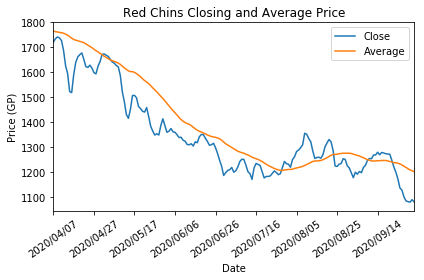

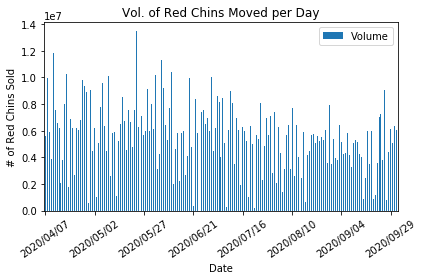

In [4]:
#visually verify that the data collected matches official OSRS GX listing
redChins.plot_time_series("Item Timestamps", ["Close", "Average"], "Red Chins Closing and Average Price", ylabel="Price (GP)", save_plot=False, verbose=True)
redChins.plot_bar_graph("Item Timestamps", ["Volume"], "Vol. of Red Chins Moved per Day", ylabel="# of Red Chins Sold", save_plot=False, verbose=True)

/Users/nikourriola/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


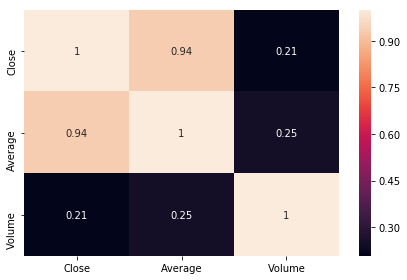

,Close,Average,Volume
Close,1.000000,0.937428,0.207546
Average,0.937428,1.000000,0.250541
Volume,0.207546,0.250541,1.000000


In [5]:
#check for possible correlations with these time series
redChins.correlation_matrix(["Close", "Average", "Volume"], " Red Chins Correlation Matrix", save=False, verbose=True)

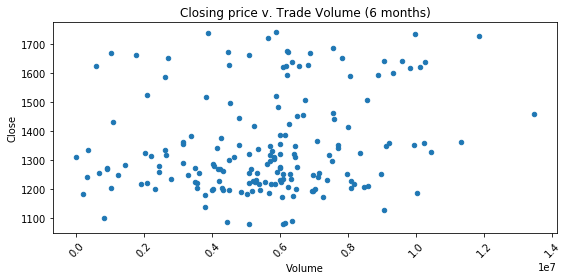

In [6]:
redChins.table.plot.scatter("Volume", "Close", rot=45, figsize=(8,4), title="Closing price v. Trade Volume (6 months)")

Although the correlation coefficient seems substantive, the trade volume is not the force behind closing price changes. I'm curious to know if the clustering seen in the scatter plot can be explained by trading pattern trends.

From a seller's POV a rapidly declining price might signal to me that I should cash out my supply of chins. In another case, it could be a sign to continue waiting for the price to move back up.

I specifically want to note what happened around Sept. 26th. The most units moved in that 30 day period happened on 25/09/20 which is also the tail end of a crash. The day after, it seemed like the number of units sold slowed the crash somewhat. Let's actaully put numbers to these observations with simple plots/calculations

Building off of this observation... 

**Question**:  What does the series look like per month?

In [7]:
#label each record with its month
months = {"01":"Jan",
"02":"Feb",
"03":"Mar",
"04":"Apr",
"05":"May",
"06":"Jun",
"07":"Jul",
"08":"Aug",
"09":"Sep",
"10":"Oct",
"11":"Nov",
"12":"Dec"}

rdf = redChins.table
rdf["Month"] = rdf["Timestamps"].apply(lambda x: x[5:7])
rdf["Month"] = rdf["Month"].apply(lambda x: months[x])

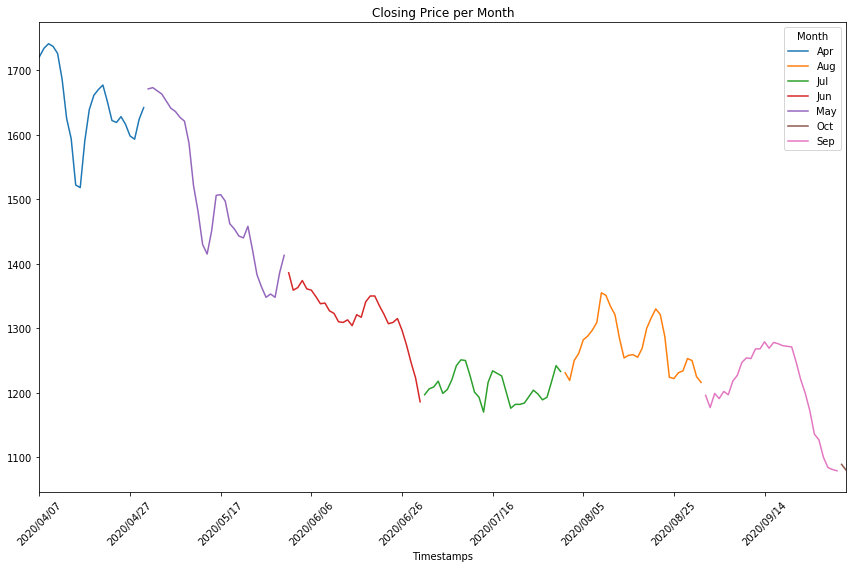

In [8]:
pvt = rdf.pivot(index="Timestamps", columns="Month", values=["Close", "Volume"])
pvt["Close"].plot(rot=45, figsize=(12,8), title="Closing Price per Month")

Each month looks like it can be characterized as having negative overall trend and 2 distinct price drops.
(**sinusoidal**)

What experiment can I make that would test the frequency of price drops per month; for the whole data set? 

*NB:  September looks like the first time in 6 months that only 1 major price drop occurred*

### September ###

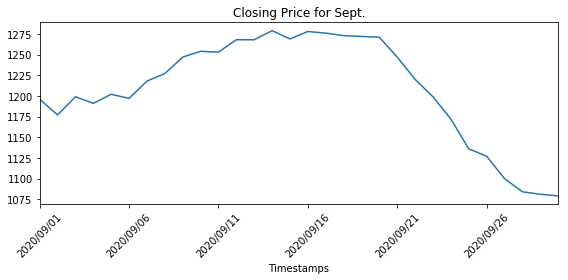

In [9]:
sepClose = pvt["Close"]["Sep"].dropna()
sepClose.plot(rot=45, figsize=(8,4), title="Closing Price for Sept.")

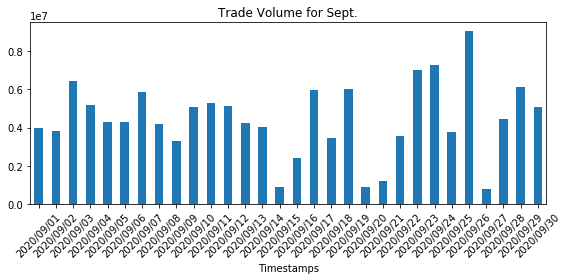

In [10]:
sepVol = pvt["Volume"]["Sep"].dropna()
sepVol.plot.bar(rot=45, figsize=(8,4), title="Trade Volume for Sept.")

In [11]:
import pandas as pd
sepDf = pd.DataFrame(data={"Close":sepClose, "Volume":sepVol})
sepDf.corr()

,Close,Volume
Close,1.00000,-0.24697
Volume,-0.24697,1.00000


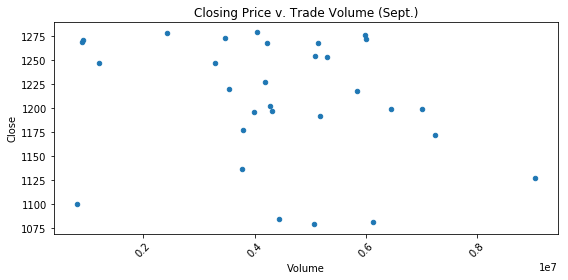

In [12]:
sepDf.plot.scatter("Volume", "Close", rot=45, figsize=(8,4), title="Closing Price v. Trade Volume (Sept.)")

Focusing on only September reveals that the correlation (close and volume) is equally as strong, but with a sign change.

## Differenced Closing Price ##

#### Differenced Closing price histogram

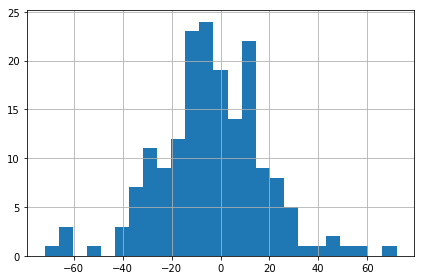

In [14]:
rdf["Differenced Close"] = rdf["Close"].diff()
rdf["Differenced Close"].hist(bins=25)

The distribution of price differences is slightly biased toward negative values (falls), explaining the overall decreasing trend.

In [15]:
rdf["Differenced Close"].describe()

count    178.000000
mean      -3.601124
std       21.678269
min      -72.000000
25%      -15.000000
50%       -3.500000
75%        9.000000
max       72.000000
Name: Differenced Close, dtype: float64

### Do red or black chinchompas sell more?

In [16]:
bdf = blkChins.table

In [64]:
volumes = pd.DataFrame()
volumes["Red Chinchompas"] = rdf["Volume"]
volumes["Black Chinchompas"] = bdf["Volume"]
volumes

,Red Chinchompas,Black Chinchompas
1,5637673.0,1803924.0
2,9968057.0,2934738.0
3,5868933.0,1970588.0
4,3882743.0,1329140.0
5,11836445.0,3775753.0
6,7549086.0,2212882.0
7,6551988.0,1568562.0
8,6183969.0,1796671.0
9,2080822.0,612489.0
10,3806440.0,1299774.0


Across the entire data set, red chinchompas are sold more on average. 

When the trade volume for red chinchompas reached a maximum, what was happening with black chinchompas? What about when black chinchompas reached a maxmimum?

In [65]:
redChinsMax = rdf[rdf["Volume"]==rdf["Volume"].max()]
redChinsMax

,Item Timestamps,Timestamps_close,Close,Timestamps_average,Average,Timestamps,Volume,Month,Differenced Close
47,2020/05/23,2020/05/23,1458,2020/05/23,1560,2020/05/23,13453337.0,May,18.0


In [71]:
combined = pd.concat([rdf, bdf], sort=False, keys=["Red Chinchompas", "Black Chinchompas"])
combined.iloc[176:180]

Item Timestamps Timestamps_close  Close  \
Red Chinchompas   177      2020/09/30       2020/09/30   1079   
                  178      2020/10/01       2020/10/01   1089   
                  179      2020/10/02       2020/10/02   1080   
Black Chinchompas 1        2020/04/07       2020/04/07   3411   

                      Timestamps_average  Average  Timestamps     Volume  \
Red Chinchompas   177         2020/09/30     1208  2020/09/30  5065126.0   
                  178         2020/10/01     1205  2020/10/01  6342555.0   
                  179         2020/10/02     1201  2020/10/02  6068003.0   
Black Chinchompas 1           2020/04/07     3529  2020/04/07  1803924.0   

                      Month  Differenced Close  
Red Chinchompas   177   Sep               -2.0  
                  178   Oct               10.0  
                  179   Oct               -9.0  
Black Chinchompas 1     NaN                NaN

In [91]:
redMaxIloc = combined["Volume"]["Red Chinchompas"][combined["Volume"]["Red Chinchompas"]==combined["Volume"]["Red Chinchompas"].max()]
redMaxIloc = int(redMaxIloc)

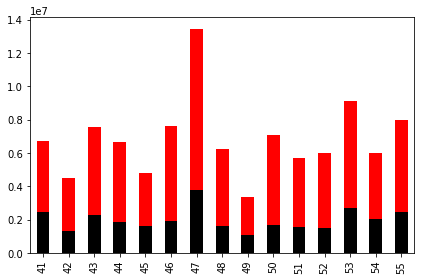

In [101]:
#trade volumes 14 days around peak red chinchompa volume
combined["Volume"]["Red Chinchompas"].iloc[40:55].plot(color="red", label="Red Chinchompas", kind="bar")
combined["Volume"]["Black Chinchompas"].iloc[40:55].plot(color="black", label="Black Chinchompas", kind="bar")

When the trade volume of red chinchompas peaked, black chinchompas were also at a local maximum

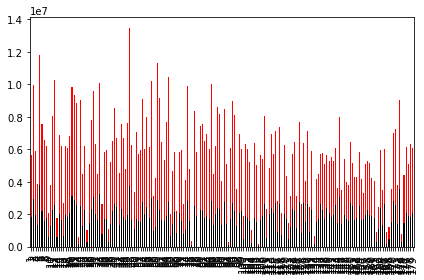

In [106]:
import matplotlib.pyplot as plt
combined["Volume"]["Red Chinchompas"].plot(color="red", label="Red Chinchompas", kind="bar")
combined["Volume"]["Black Chinchompas"].plot(color="black", label="Black Chinchompas", kind="bar")

So overall, more red chinchompas are sold than black chinchompas. I think the scarcity of black chinchompas contributes to their price when compared to red chinchompas